In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import time
# display parameters
from IPython.display import display
import PrintNNinfo as out

Network Info</br>

| id_pre | id_post | target ids |
|:---:|:---:|:---:|
| integer | integer | integer |


Neuron</br>

| cell# | tau | r | e | vth | vahp | vmax | t_refrac |
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
| integer | ms | $$M\Omega$$ | mV | mV | mV | mV | ms |

Synapse</br>

| synapse# | tau1 | tau2 | A | gmax | e | d |
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
| integer | ms | ms | a.u. | $$\mu S$$ | mV | ms |

Extern Stim</br>

| stim# | id_target | len | spk_times |
|:---:|:---:|:---:|:---:|
| integer | integer | integer | doubles (>-1) |  

In [3]:
# set PN cell type & cells parameter
params_pn = {'tau':20, 'r':100, 'e':-65, 'vth':-40, 'vahp':-80, 'v0':-65, 'vmax':30, 't_refrac':10}
params_pv = {'tau':5, 'r':100, 'e':-65, 'vth':-50, 'vahp':-80, 'v0':-65, 'vmax':30, 't_refrac':0}
# set synapse type & parameter
syn_pn2pn = {'gmax':0.004, 'tau_r':0.1, 'tau_d':8, 'e':0, 'd':0}
syn_pn2pv = {'gmax':0.002, 'tau_r':0.1, 'tau_d':2, 'e':0, 'd':0}
syn_pv2pn = {'gmax':0.004, 'tau_r':0.1, 'tau_d':4, 'e':-80, 'd':0}
syn_pv2pv = {'gmax':0.001, 'tau_r':0.1, 'tau_d':4, 'e':-80, 'd':0}
# syn_types = [syn_pn2pn, syn_pn2pv, syn_pv2pn, syn_pv2pv]
# extern parameters
ext_pn2pn = {'gmax':0.01, 'tau_r':0.1, 'tau_d':5, 'e':0, 'd':0}
ext_pn2pv = {'gmax':0.01, 'tau_r':0.1, 'tau_d':5, 'e':0, 'd':0}
ext_pv2pn = {'gmax':0.01, 'tau_r':0.1, 'tau_d':2, 'e':-80, 'd':0}
ext_pv2pv = {'gmax':0.01, 'tau_r':0.1, 'tau_d':2, 'e':-80, 'd':0}
# ext_syn_types = [ext_pn2pn, ext_pn2pv, ext_pv2pn, ext_pv2pv]


In [4]:
# test network
cell_types = [0, 1]
cnt_map = [[-1, 0], [1, -1]]
target_ids = [[0, 1]]
ext_types = [[0, 1]]
t_stims = [np.linspace(0, 300, 20)]

In [5]:
out.print_nn_params('./parameter/', 'test', cell_types, cnt_map, [params_pn, params_pv], [syn_pn2pv, syn_pv2pn], target_ids, ext_types, t_stims, [ext_pn2pn, ext_pn2pv], overwrite=True)

./parameter/test_cell.csv exists
./parameter/test_syn.csv exists
./parameter/test_t_spike.csv exists
done



In [6]:
tmax = 1000
dt = 0.01
# network
n_excs = 160
n_inhs = 40
n_cells = n_excs + n_inhs
cell_types = []
for i in range(n_cells):
    if i < n_excs:
        cell_types.append(0)
    else:
        cell_types.append(1)
# cnt_map
cnt_map = np.ones([n_cells, n_cells], dtype=np.int) * (-1)
syn_types = [[0, 1], [2, 3]]
for i in range(n_cells):
    for j in range(n_cells):
        if i!=j:
            cnt_map[i, j] = syn_types[cell_types[i]][cell_types[j]]
# exts
targets = [i for i in range(n_cells)]
target_ids = []
ext_types = []
for i in range(n_cells//2):
    a1 = np.random.choice(targets)
    targets.remove(a1)
    a2 = np.random.choice(targets)
    target_ids.append([a1, a2])
    ext_types.append([cell_types[a1], cell_types[a2]])

p = 0.1
t = np.arange(0, tmax, dt)
t_stims = []
for i in range(n_cells//2):
    p_bd = p * dt
    rands = np.random.uniform(low=0, high=1, size=int(tmax/dt))
    t_stims.append(t[rands < p_bd])


In [7]:
out.print_nn_params('./parameter/', 'ntk_test', cell_types, cnt_map, [params_pn, params_pv],
        [syn_pn2pn, syn_pn2pv, syn_pv2pn, syn_pv2pv], target_ids, ext_types, t_stims, [ext_pn2pn, ext_pn2pv],
        overwrite=True)

./parameter/ntk_test_cell.csv exists
./parameter/ntk_test_syn.csv exists
./parameter/ntk_test_t_spike.csv exists
done



In [8]:
with open("./v_test.csv", 'r') as fid:
    vcell = [float(v) for v in fid.readline().split(',')[:-1]]

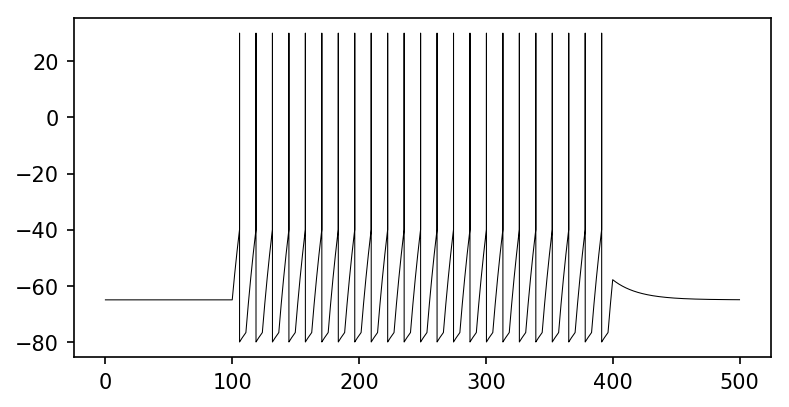

In [9]:
plt.figure(dpi=150, figsize=(6, 3))
plt.plot(np.arange(0, 500+0.001, 0.01), vcell, 'k', lw=0.5)
plt.show()

In [10]:
# load
t = []
vcells = []
with open('./out.csv', 'r') as fid:
    line = fid.readline()
    while line:
        vals = line[:-1].split(',')
        t.append(float(vals[0]))
        vcells.append([float(v) for v in vals[1:]])
        line = fid.readline()
    # vals = fid.readline()[:-1].split(',')
vcells = np.array(vcells)

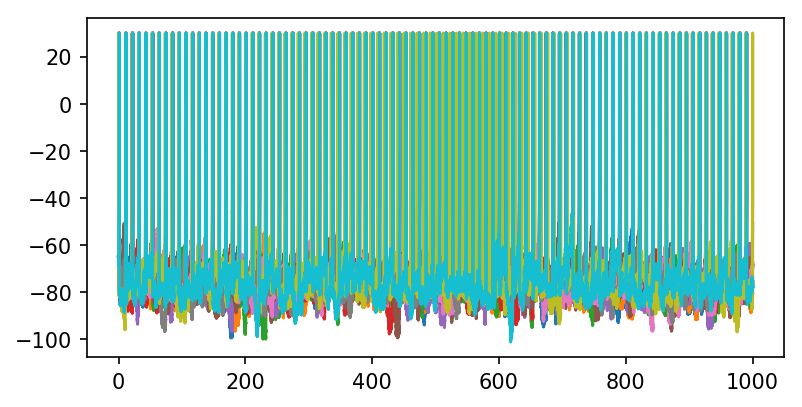

In [11]:
plt.figure(dpi=150, figsize=(6, 3))
plt.plot(t, vcells[:, :10])
# plt.xlim([-10, 50])
# plt.ylim([-80, 40])
plt.show()

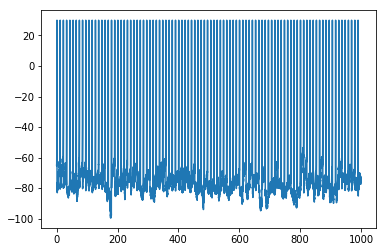

In [12]:
plt.plot(t, vcells[:, 0])